In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import (
    QiskitRuntimeService,
    SamplerV2 as Sampler,
    EstimatorV2 as Estimator,
    Batch,
)
from heisenberg import HeisenbergModel, get_n_steps
from qiskit.quantum_info.operators import Operator
from qiskit_aer import AerSimulator

In [ ]:
n_qubits = 4

# rng = np.random.default_rng(42)
# Js = 2 * rng.random(n_qubits - 1) - 1
Js = [1, -1, 1]

# total time to be simulated
# times = np.linspace(0, 10, 100)
times = np.linspace(0, 10, 20)

# Option1: Use IBM Quantum backend.
# If you did not previously save your credentials, use the following line instead:
# service = QiskitRuntimeService(channel="ibm_quantum", token="<MY_IBM_QUANTUM_TOKEN>")
service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)

# Option2: Use local AerSimulator as the backend.
# backend = AerSimulator()

print(f"Using backend: {backend}")
heisenberg = HeisenbergModel(backend, n_qubits, Js)

Using backend: AerSimulator('aer_simulator')


In [4]:
exact_results = []

for t in times:
    n_steps = get_n_steps(t)
    exact_result = heisenberg.exact_simulation(t)
    print(f"t = {t}")
    print(f"exact_result = {exact_result}")

    exact_results.append(exact_result)

t = 0.0
exact_result = 0.9999999999999996
t = 0.5263157894736842
exact_result = 0.48171918196238656
t = 1.0526315789473684
exact_result = 0.3284231986111489
t = 1.5789473684210527
exact_result = 0.3289761398866748
t = 2.1052631578947367
exact_result = 0.17124036427769387
t = 2.631578947368421
exact_result = 0.26219118284748727
t = 3.1578947368421053
exact_result = 0.7623407123474396
t = 3.6842105263157894
exact_result = 0.5231916141902826
t = 4.2105263157894735
exact_result = 0.5985815554414927
t = 4.7368421052631575
exact_result = 0.6217108329471355
t = 5.263157894736842
exact_result = 0.2783939620811974
t = 5.789473684210526
exact_result = 0.13863772302440425
t = 6.315789473684211
exact_result = 0.4015419667047566
t = 6.842105263157895
exact_result = 0.28865648689359913
t = 7.368421052631579
exact_result = 0.6551010451994365
t = 7.894736842105263
exact_result = 0.8666674257421088
t = 8.421052631578947
exact_result = 0.47000963906212084
t = 8.947368421052632
exact_result = 0.297783762

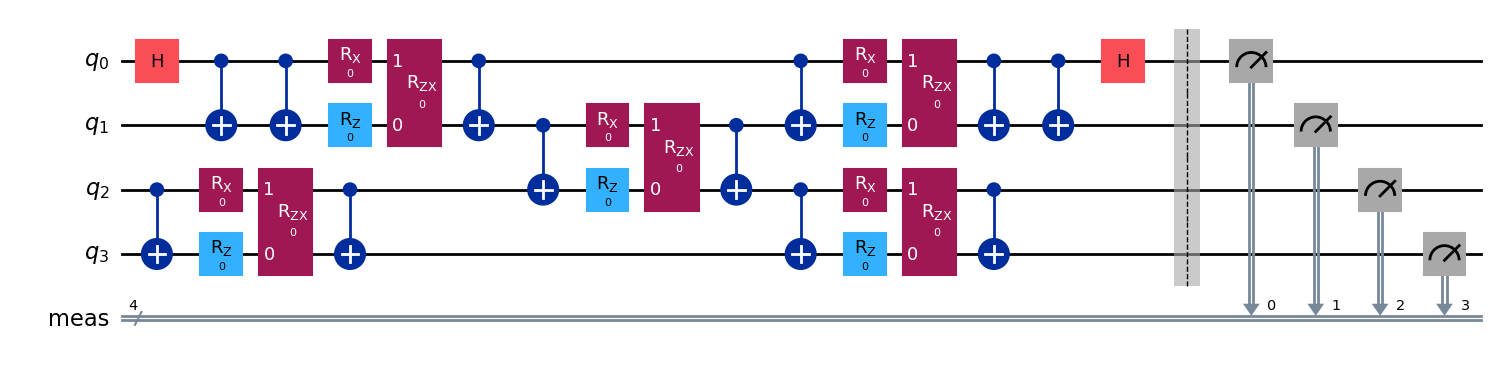

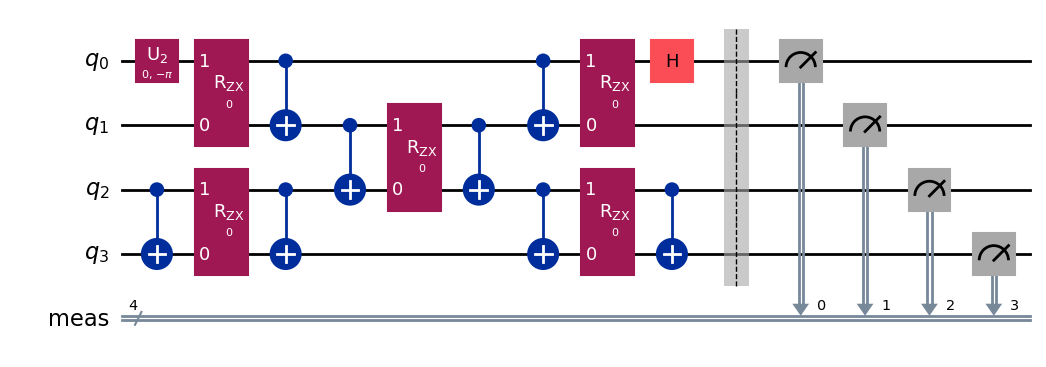

In [5]:
isa_circuits = []

for t in times:
    n_steps = get_n_steps(t)

    isa_circuit = heisenberg.get_trotter_simulation_circuits(t, n_steps)
    isa_circuits.append(isa_circuit)

In [ ]:
with Batch(backend=backend):
    # sampler = Sampler()
    # sampler.options.default_shots = 1000

    # job = sampler.run(isa_circuits)

    estimator = Estimator()
    estimator.options.default_shots = 1000
    estimator.options.resilience_level = 2

In [7]:
# Post-processing
probs = []

for result in job.result():
    if "0" * n_qubits not in result.data.meas.get_counts():
        print(" > No counts for |0...0> state")
        prob0 = 0
    else:
        prob0 = (
            result.data.meas.get_counts()["0" * n_qubits] / result.data.meas.num_shots
        )

    probs.append(prob0)

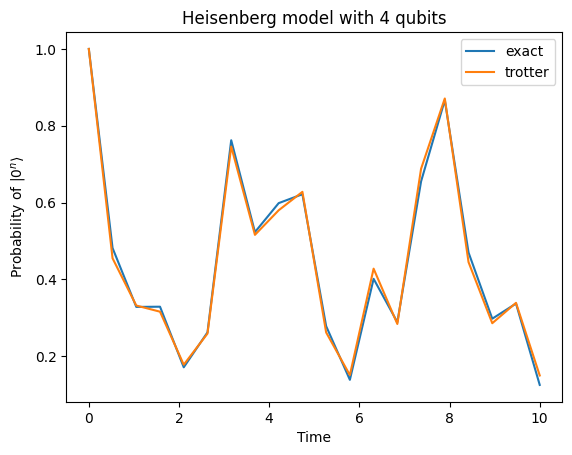

In [8]:
# Plot the results
plt.plot(times, exact_results, label="exact")
plt.plot(times, probs, label="trotter")
plt.title(f"Heisenberg model with {n_qubits} qubits")
plt.xlabel("Time")
plt.ylabel("Probability of $|0^n\\rangle$")
plt.legend()
plt.show()